In [1]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [3]:
x_test.shape

(10000, 32, 32, 3)

In [4]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [5]:
x_train = x_train / 255
x_test = x_test / 255

In [6]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [7]:
y_train_categorical = keras.utils.to_categorical(y_train, num_classes = 10, dtype = 'float32')

In [8]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [9]:
y_test_categorical = keras.utils.to_categorical(y_test, num_classes = 10, dtype = 'float32')
y_test_categorical[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [20]:
def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape = (32, 32, 3)),
        keras.layers.Dense(3000, activation = 'relu'),
        keras.layers.Dense(1000, activation = 'relu'),
        keras.layers.Dense(10, activation = 'sigmoid')
    ])

    model.compile(
        optimizer = 'SGD',
        loss = 'categorical_crossentropy',
        metrics = ['accuracy']
    )
    return model

In [11]:
# %%timeit -n1 -r1
# with tf.device('/CPU:0'):
#     cpu_model = get_model()
#     cpu_model.fit(x_train, y_train_categorical, epochs = 1)

In [12]:
# %%timeit -n1 -r1
# with tf.device('/GPU:0'):
#     gpu0_model = get_model()
#     gpu0_model.fit(x_train, y_train_categorical, epochs = 1)

In [13]:
# %%timeit -n1 -r1
# with tf.device('/GPU:1'):
#     gpu1_model = get_model()
#     gpu1_model.fit(x_train, y_train_categorical, epochs = 1)

In [14]:
# %%timeit -n1 -r1
# with tf.device('/CPU:0'):
#     cpu_model = get_model()
#     cpu_model.fit(x_train, y_train_categorical, epochs = 10)

In [16]:
# %%timeit -n1 -r1
# with tf.device('/GPU:0'):
#     gpu0_model = get_model()
#     gpu0_model.fit(x_train, y_train_categorical, epochs = 10)

In [23]:
model = get_model()
model.fit(x_train, y_train_categorical, epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 8s 4ms/step - loss: 1.8116 - accuracy: 0.3553
Epoch 2/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6228 - accuracy: 0.4263
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5397 - accuracy: 0.4571
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4838 - accuracy: 0.4767
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4323 - accuracy: 0.4947
Epoch 6/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3884 - accuracy: 0.5115
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3521 - accuracy: 0.5269
Epoch 8/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3165 - accuracy: 0.5394
Epoch 9/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2833 - accuracy: 0.5498
Epoch 10/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.252

In [24]:
model.evaluate(x_test, y_test_categorical)

313/313 [==============================] - 1s 3ms/step - loss: 1.5981 - accuracy: 0.5664


[1.5981404781341553, 0.5663999915122986]

In [25]:
y_predicted = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [26]:
y_predicted = [np.argmax(i) for i in y_predicted]
y_predicted[:5]

[3, 8, 0, 0, 4]

In [27]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [28]:
cm = tf.math.confusion_matrix(labels = y_test, predictions=y_predicted)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[816,  22,  27,  12,  36,   8,  10,   6,  30,  33],
       [ 64, 701,  13,  19,  11,   7,  12,  12,  29, 132],
       [127,   8, 386,  76, 212,  70,  47,  42,  12,  20],
       [ 58,  24,  66, 408, 112, 177,  61,  38,  14,  42],
       [ 76,  10,  79,  60, 608,  46,  44,  45,  13,  19],
       [ 50,  10,  69, 221, 110, 445,  27,  42,   9,  17],
       [ 34,  22,  42, 103, 156,  51, 546,  15,   7,  24],
       [ 60,  13,  46,  53, 103,  72,   8, 597,   4,  44],
       [248,  74,  15,  22,  25,  15,   5,   6, 552,  38],
       [104, 149,  15,  25,  20,  14,   8,  30,  33, 602]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

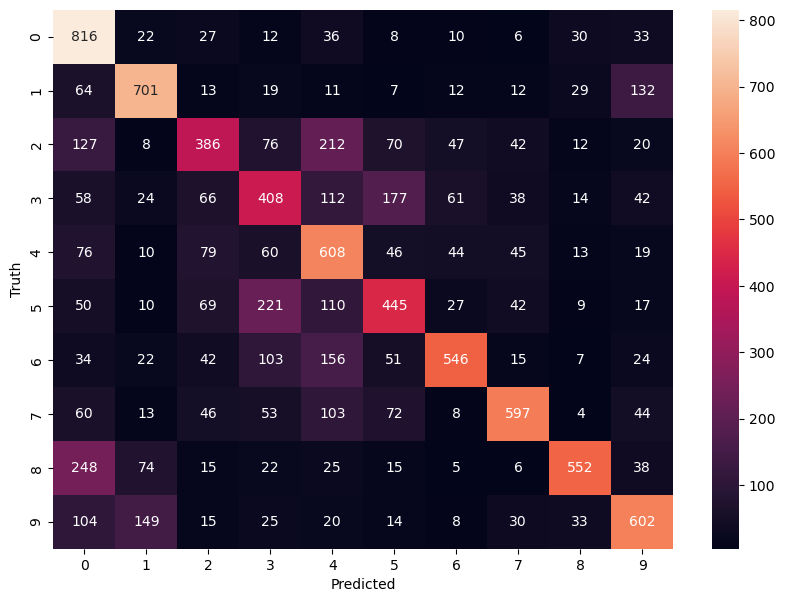

In [30]:
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')